In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
np.random.seed(1234)

# Import some data

In [6]:
from sklearn.datasets import fetch_california_housing

X, _ = fetch_california_housing(return_X_y= True)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


<Axes: xlabel='6', ylabel='7'>

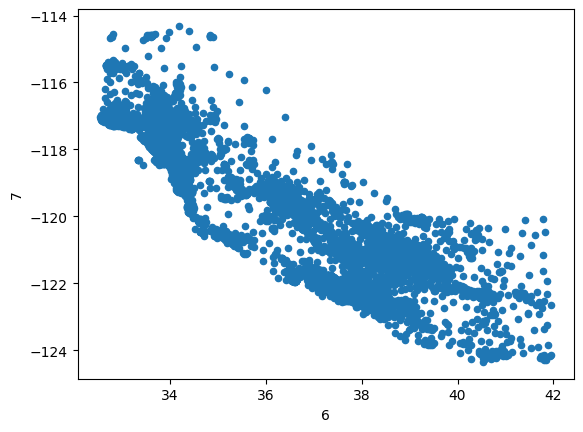

In [7]:
X.plot(kind='scatter', x = 6, y=7)

# Step 1: Normalize the data

In [8]:
mu = X.mean()
sigma = X.std()

Xnorm = (X-mu)/sigma
Xnorm

,0,1,2,3,4,5,6,7
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595,1.052523,-1.327803
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510,1.043159,-1.322812
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842,1.038478,-1.332794
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328,1.038478,-1.337785
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614,1.038478,-1.337785
...,...,...,...,...,...,...,...,...
20635,-1.216099,-0.289180,-0.155020,0.077352,-0.512579,-0.049109,1.801603,-0.758808
20636,-0.691576,-0.845373,0.276874,0.462353,-0.944382,0.005021,1.806285,-0.818702
20637,-1.142566,-0.924829,-0.090316,0.049413,-0.369528,-0.071733,1.778194,-0.823693
20638,-1.054557,-0.845373,-0.040210,0.158774,-0.604415,-0.091223,1.778194,-0.873605


<Axes: xlabel='6', ylabel='7'>

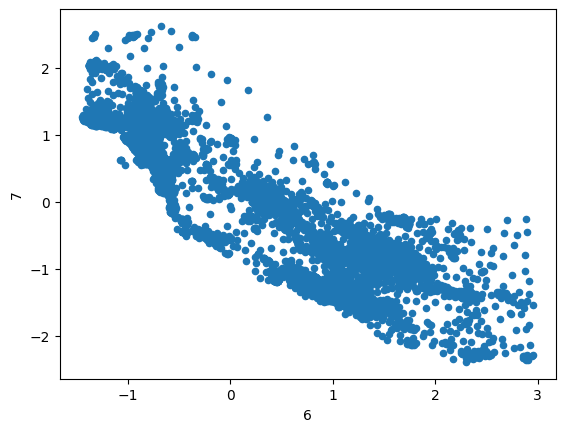

In [9]:
Xnorm.plot(kind='scatter', x=6, y=7)

In [10]:
Xnorm.describe()

,0,1,2,3,4,5,6,7
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,7.711317e-17,3.855658e-17,7.711317e-17,-1.046536e-16,-1.927829e-17,6.885104e-19,-9.914550e-16,-8.570577e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.774256e+00,-2.196127e+00,-1.852274e+00,-1.610729e+00,-1.256092e+00,-2.289944e-01,-1.447533e+00,-2.385935e+00
25%,-6.881019e-01,-8.453727e-01,-3.994399e-01,-1.911670e-01,-5.637952e-01,-6.170912e-02,-7.967694e-01,-1.113182e+00
50%,-1.767908e-01,2.864502e-02,-8.078293e-02,-1.010626e-01,-2.291262e-01,-2.431526e-02,-6.422715e-01,5.389006e-01
75%,4.592952e-01,6.642943e-01,2.519554e-01,6.015724e-03,2.644885e-01,2.037404e-02,9.729330e-01,7.784775e-01
max,5.858144e+00,1.856137e+00,5.516190e+01,6.957003e+01,3.024960e+01,1.194162e+02,2.957996e+00,2.625216e+00


# Step 2: Perform SVD on the normalized Data

In [11]:
from scipy.linalg import svd

In [16]:
U, s, Vt = svd(Xnorm, full_matrices=False)

Sigma = np.diag(s)
V = Vt.T

# Check the decomposition

In [21]:
np.allclose(Xnorm, U @ Sigma @ V.T)

True

# We can recover the original dataset from the decomposition

In [23]:
np.allclose(X, mu + sigma*pd.DataFrame(U @ Sigma @ V.T))

True

# Project data to 4 dimensions

In [28]:
r = 4

Ur = U[:, : r]
SigmaR = Sigma[:r, :r]

Xrr = pd.DataFrame(Ur @ SigmaR)
Xrr

,0,1,2,3
0,-1.882659,-0.503350,-0.314127,-2.555031
1,-1.371086,-0.121403,1.905212,-1.872938
2,-2.086817,-0.501124,-0.937222,-2.100082
3,-1.575763,-1.239465,-1.025933,-1.286690
4,-1.591167,-1.345231,-1.249141,-0.450767
...,...,...,...,...
20635,-1.386746,-1.296106,0.054261,1.063000
20636,-1.875174,-0.671517,0.155696,0.644596
20637,-1.402323,-1.096399,0.567121,1.090370
20638,-1.542906,-1.059383,0.365464,0.968775


# Incorporate new data

In [30]:
X 


,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [36]:
newHome = [3.1394, 45.0, 5.983942, 0.0, 892.0, 3.291038, 37.90, -121.00]

newHome_norm = (newHome-mu)/sigma

newHome_proj = newHome_norm @ V[:, :r]
Xrr.loc[len(Xrr)] = newHome_proj
Xrr


,0,1,2,3
0,-1.882659,-0.503350,-0.314127,-2.555031
1,-1.371086,-0.121403,1.905212,-1.872938
2,-2.086817,-0.501124,-0.937222,-2.100082
3,-1.575763,-1.239465,-1.025933,-1.286690
4,-1.591167,-1.345231,-1.249141,-0.450767
...,...,...,...,...
20640,-0.220056,-2.212240,-0.439600,-0.704969
20641,-0.220056,-2.212240,-0.439600,-0.704969
20642,-0.220056,-2.212240,-0.439600,-0.704969
20643,-0.220056,-2.212240,-0.439600,-0.704969


# Clustering

In [49]:
def myscatter(data, assignment):
    sns.scatterplot(data= data, x = 'Annual Income (k$)', y= 'Spending Score (1-100)' ,
                    hue = assignment, 
                    palette= sns.color_palette('Set1', as_cmap=True))

# Load the data

In [40]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [41]:
data = data.set_index('CustomerID')

In [ ]:
X=data[['Annual Income (k$)', 'Spending Score (1-100)']]

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

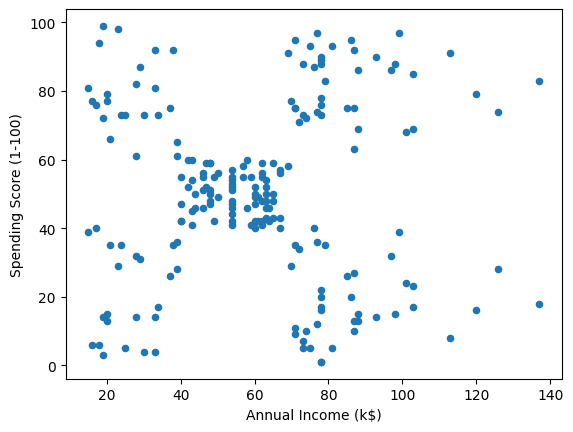

In [44]:
X.plot(kind='scatter', x='Annual Income (k$)', y ='Spending Score (1-100)')

# K-mean

In [64]:
kmeans = cluster.KMeans(n_clusters=5, init='random')

In [65]:
kmeans.fit(X)

KMeans(init='random', n_clusters=5)

In [66]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2,
       3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

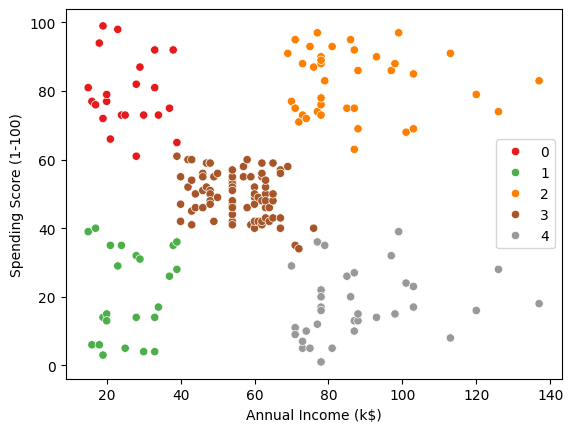

In [67]:
myscatter(X, kmeans.labels_)

# Improved initialization: kmeans++

In [57]:
kmeanspp = cluster.KMeans(n_clusters=5, init= 'k-means++', verbose= 0).fit(X)

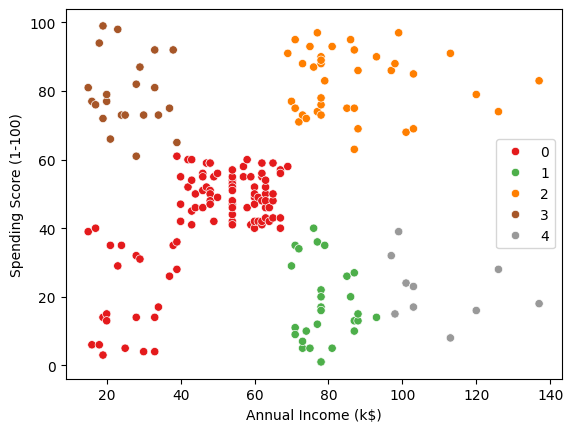

In [58]:
myscatter(X, kmeanspp.labels_)

# DBSCAN:
Density-Based Spatial Clustering of Applications with Noise

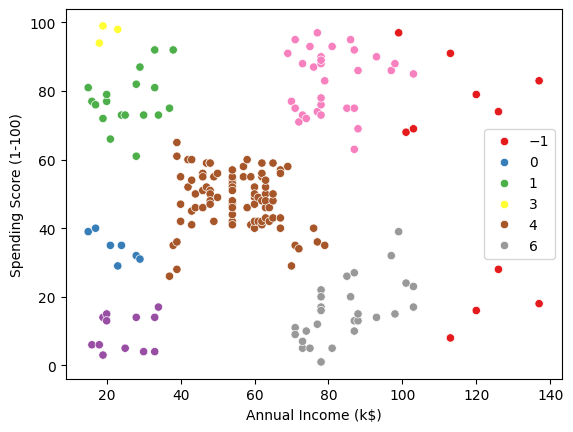

In [59]:
dbscan = cluster.DBSCAN(eps=9, min_samples=3).fit(X)
myscatter(X, dbscan.labels_)

# Prediction    

In [ ]:
Xnew = np.array([[30,20], [80,20]])



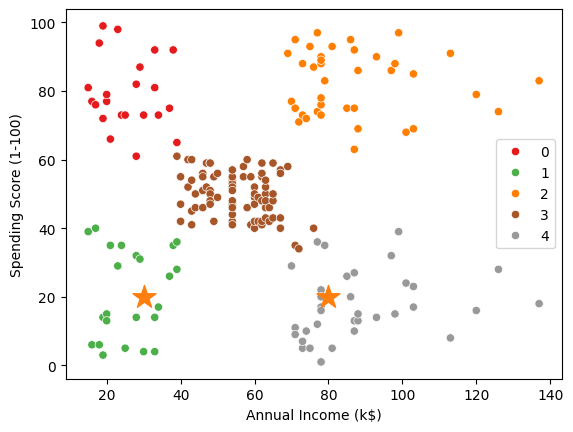

In [71]:
myscatter(data, kmeans.labels_)
plt.scatter(Xnew[:, 0], Xnew[:,1], marker= '*', s=300)

In [69]:
kmeans.predict(Xnew)

/Users/akshitmehta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 4], dtype=int32)